# Validation loss vs test MAPE

In [1]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

from src.metrics import *

In [2]:
experiment_path = "/datadrive/experiments/deep_ar/electricity"
exp = load_data(experiment_path + "/6B")
exp_array = calculate_timeseries_means(exp, ["MAPE"], 321)

In [3]:
logdir = "/datadrive/logs/deep_ar/electricity"
folders = os.listdir(logdir)
date = "2020-08-24"

validation_loss = np.empty((100, 20))


for folder in folders:
    if not folder.startswith("seed") or not folder.endswith(date):
        continue

    seed_num = int(re.split("(\d+)", folder)[1])

    ea = event_accumulator.EventAccumulator(
        f"{logdir}/{folder}",
        size_guidance={event_accumulator.SCALARS: 0}
    )
    ea.Reload()
    for i in range(len(ea.Scalars("validation_loss"))):
        validation_loss[seed_num, i] = ea.Scalars("validation_loss")[i].value

validation_loss, validation_loss.shape

(array([[ 7.33529615,  7.20173264,  6.85569763, ...,  6.24090767,
          6.12933874,  6.32554436],
        [13.50861168,  6.7228179 ,  6.47709417, ...,  6.546731  ,
          6.9841795 ,  6.22366667],
        [ 7.17872715,  7.01710653,  6.47811079, ...,  6.19632006,
          6.40353489,  6.12749815],
        ...,
        [ 7.02343464,  8.21784782,  6.63644457, ...,  5.98287201,
          6.17001438,  6.03050375],
        [ 7.39551687,  7.22087479,  7.50880337, ...,  5.96858883,
          6.2194953 ,  6.60394287],
        [ 7.01063919,  7.31733751,  6.49451876, ...,  6.05900621,
          6.31935787,  5.97677803]]),
 (100, 20))

Text(0, 0.5, 'MAPE')

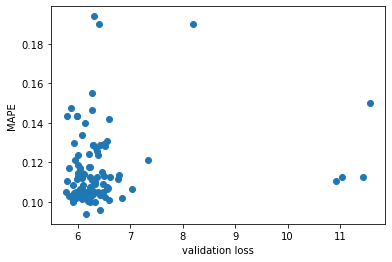

In [4]:
plt.scatter(validation_loss[:, -1], exp_array.mean(axis=1))
plt.xlabel("validation loss")
plt.ylabel("MAPE")

In [5]:
exp = load_data(experiment_path + "/7B")
exp_array = calculate_timeseries_means(exp, ["MAPE"], 321)

In [6]:
logdir = "/datadrive/logs/deep_ar/electricity"
folders = os.listdir(logdir)
date1 = "2020-08-27"
date2 = "2020-08-28"

validation_loss = np.empty((100, 50))


for folder in folders:
    if not folder.startswith("seed") or not (folder.endswith(date1) or folder.endswith(date2)):
        continue

    seed_num = int(re.split("(\d+)", folder)[1])

    ea = event_accumulator.EventAccumulator(
        f"{logdir}/{folder}",
        size_guidance={event_accumulator.SCALARS: 0}
    )
    ea.Reload()
    
    for i in range(len(ea.Scalars("validation_loss"))):
        validation_loss[seed_num, i] = ea.Scalars("validation_loss")[i].value

validation_loss, validation_loss.shape


(array([[ 7.33529615,  7.20173264,  6.85569763, ...,  6.36073923,
          6.08701897,  5.97016001],
        [13.50861168,  6.7228179 ,  6.47709417, ...,  5.87521648,
          5.96110916,  5.7144413 ],
        [ 7.17872715,  7.01710653,  6.47811079, ...,  5.8427887 ,
          5.69839001,  5.86053848],
        ...,
        [ 7.02343464,  8.21784782,  6.63644457, ...,  5.49188852,
          7.05139446,  5.89459848],
        [ 7.39551687,  7.22087479,  7.50880337, ...,  5.63214684,
          5.69644785,  6.19645452],
        [ 7.01063919,  7.31733751,  6.49451876, ...,  5.84734535,
          6.37383127,  5.88606024]]),
 (100, 50))

Text(0, 0.5, 'MAPE')

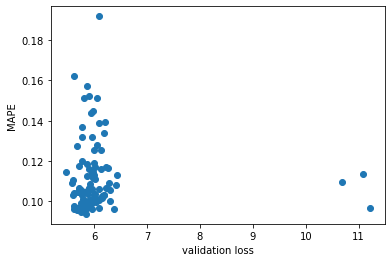

In [11]:
plt.scatter(validation_loss[:, -1], exp_array.mean(axis=1))
plt.xlabel("validation loss")
plt.ylabel("MAPE")